In [50]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.layers.core import Dense, Activation, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
df = pd.read_csv('dataset.csv')

In [7]:
df.head()

날짜    역번호          역명    구분   05~06   06~07   07~08   08~09   \
0   2008-01-01     150   서울역(150)    승차     379     287     371     876    
1   2008-01-01     150   서울역(150)    하차     145     707     689   1,037    
2   2008-01-01     151    시청(151)    승차     131     131     101     152    
3   2008-01-01     151    시청(151)    하차      35     158     203     393    
4   2008-01-01     152    종각(152)    승차   1,287     867     400     330    

   09~10   10~11    ...    15~16   16~17   17~18   18~19   19~20   20~21   \
0    965   1,389    ...    2,520   3,078   3,495   3,055   2,952   2,726    
1  1,170   1,376    ...    1,955   2,304   2,203   2,128   1,747   1,593    
2    191     202    ...      892     900   1,154   1,706   1,444   1,267    
3    375     460    ...    1,157   1,153   1,303   1,190     830     454    
4    345     338    ...    1,867   2,269   2,777   2,834   2,646   2,784    

   21~22   22~23   23~24     24~   
0  3,307   2,584   1,059     264   
1  1,078     744     406     558   
2    928     531     233     974   
3    284     141     107     185   
4  2,920   2,290     802   1,559   

[5 rows x 24 columns]

In [8]:
df.columns

Index([' 날짜 ', ' 역번호 ', ' 역명 ', ' 구분 ', ' 05~06 ', ' 06~07 ', ' 07~08 ',
       ' 08~09 ', ' 09~10 ', ' 10~11 ', ' 11~12 ', ' 12~13 ', ' 13~14 ',
       ' 14~15 ', ' 15~16 ', ' 16~17 ', ' 17~18 ', ' 18~19 ', ' 19~20 ',
       ' 20~21 ', ' 21~22 ', ' 22~23 ', ' 23~24 ', ' 24~ '],
      dtype='object')

In [15]:
df[' 역명 ']

0               서울역(150) 
1               서울역(150) 
2                시청(151) 
3                시청(151) 
4                종각(152) 
5                종각(152) 
6              종로3가(153) 
7              종로3가(153) 
8              종로5가(154) 
9              종로5가(154) 
10              동대문(155) 
11              동대문(155) 
12              신설동(156) 
13              신설동(156) 
14              제기동(157) 
15              제기동(157) 
16          청량리(지하)(158) 
17          청량리(지하)(158) 
18              동묘앞(159) 
19              동묘앞(159) 
20               시청(201) 
21               시청(201) 
22            을지로입구(202) 
23            을지로입구(202) 
24            을지로3가(203) 
25            을지로3가(203) 
26            을지로4가(204) 
27            을지로4가(204) 
28           동대문운동장(205) 
29           동대문운동장(205) 
                ...      
1922006              강동구청
1922007              강동구청
1922008              몽촌토성
1922009              몽촌토성
1922010             잠실(8)
1922011             잠실(8)
1922012                석촌
1922013     

In [17]:
s = df[' 역명 ']

In [19]:
s = set(s)

In [20]:
len(s)

547

In [24]:
s = list(s)
# s = list(set(df[' 역명 ']))

In [25]:
s

[' 상왕십리(207) ',
 '상봉(7)',
 '수서(339)',
 '성수(211)',
 '목동',
 '오금',
 ' 모란(8) ',
 '영등포시장',
 '월드컵경기장',
 '군자(5)',
 ' 공릉 ',
 ' 안암 ',
 ' 길음(417) ',
 '온수(7)',
 ' 수유(414) ',
 ' 애오개 ',
 ' 굽은다리 ',
 '이촌(430)',
 ' 내방 ',
 '잠실(216)',
 '공덕(6)',
 ' 군자(5) ',
 '먹골',
 ' 경복궁(317) ',
 '명일',
 ' 역삼(221) ',
 ' 중화 ',
 ' 이수(7) ',
 ' 아차산 ',
 '무악재(315)',
 ' 상월곡 ',
 ' 역촌 ',
 ' 옥수(325) ',
 '남한산성입구',
 ' 행당 ',
 ' 당산(237) ',
 ' 충무로(423) ',
 ' 장승배기 ',
 ' 신당(6) ',
 '도림천(247)',
 '태릉입구(7)',
 ' 개화산 ',
 ' 방화 ',
 ' 서울대입구(228) ',
 '시청(151)',
 '답십리',
 '응암',
 '당산(237)',
 ' 고속터미널(329) ',
 ' 왕십리(208) ',
 '문래(235)',
 '신용산(429)',
 ' 남한산성입구 ',
 '중계',
 ' 숙대입구(427) ',
 '동대문역사문화공원(205)',
 ' 남부터미널(331) ',
 ' 태릉입구(7) ',
 ' 월드컵경기장 ',
 '불광(312)',
 '지축(309)',
 '부천시청',
 '뚝섬(210)',
 '한성대입구(419)',
 '상월곡',
 ' 수서(339) ',
 ' 성수(211) ',
 ' 마포 ',
 '상일동',
 ' 신정 ',
 '공릉',
 '동작(431)',
 ' 명일 ',
 ' 성신여대입구(418) ',
 ' 천호(8) ',
 ' 충정로(243) ',
 '중화',
 ' 강동 ',
 '부천종합운동장',
 '신길(5)',
 '산성',
 ' 디지털미디어시티(6) ',
 ' 대림(233) ',
 ' 잠원(328) ',
 '노원(411)',
 ' 이대(241) ',
 

In [35]:
data1 = df[df[' 역명 ']==s[0]]

In [36]:
data1

날짜    역번호           역명    구분   05~06   06~07   07~08   \
32       2008-01-01     207   상왕십리(207)    승차     130     131     117    
33       2008-01-01     207   상왕십리(207)    하차      23     123     103    
556      2008-01-02     207   상왕십리(207)    승차     225     393   1,177    
557      2008-01-02     207   상왕십리(207)    하차      19     130     376    
1080     2008-01-03     207   상왕십리(207)    승차     220     362   1,163    
1081     2008-01-03     207   상왕십리(207)    하차      21     127     325    
1604     2008-01-04     207   상왕십리(207)    승차     224     364   1,129    
1605     2008-01-04     207   상왕십리(207)    하차      24     149     359    
2128     2008-01-05     207   상왕십리(207)    승차     197     255     460    
2129     2008-01-05     207   상왕십리(207)    하차      26     135     213    
2652     2008-01-06     207   상왕십리(207)    승차     109     170     179    
2653     2008-01-06     207   상왕십리(207)    하차       9     101     120    
3176     2008-01-07     207   상왕십리(207)    승차     252     453   1,273    
3177     2008-01-07     207   상왕십리(207)    하차      26     142     439    
3700     2008-01-08     207   상왕십리(207)    승차     241     429   1,194    
3701     2008-01-08     207   상왕십리(207)    하차      19     150     372    
4224     2008-01-09     207   상왕십리(207)    승차     217     429   1,193    
4225     2008-01-09     207   상왕십리(207)    하차      25     146     394    
4748     2008-01-10     207   상왕십리(207)    승차     233     397   1,137    
4749     2008-01-10     207   상왕십리(207)    하차      22     173     401    
5272     2008-01-11     207   상왕십리(207)    승차     218     393   1,137    
5273     2008-01-11     207   상왕십리(207)    하차      34     151     340    
5796     2008-01-12     207   상왕십리(207)    승차     190     262     463    
5797     2008-01-12     207   상왕십리(207)    하차      23     133     231    
6320     2008-01-13     207   상왕십리(207)    승차     114     161     182    
6321     2008-01-13     207   상왕십리(207)    하차      21     114     100    
6844     2008-01-14     207   상왕십리(207)    승차     255     384   1,244    
6845     2008-01-14     207   상왕십리(207)    하차      21     132     414    
7368     2008-01-15     207   상왕십리(207)    승차     201     386   1,194    
7369     2008-01-15     207   상왕십리(207)    하차      26     147     331    
...              ...    ...          ...   ...     ...     ...     ...   
184316   2008-12-17     207   상왕십리(207)    승차     202     307   1,081    
184317   2008-12-17     207   상왕십리(207)    하차      18     151     401    
184842   2008-12-18     207   상왕십리(207)    승차     185     333   1,052    
184843   2008-12-18     207   상왕십리(207)    하차      22     128     343    
185368   2008-12-19     207   상왕십리(207)    승차     202     300   1,060    
185369   2008-12-19     207   상왕십리(207)    하차      15     159     370    
185894   2008-12-20     207   상왕십리(207)    승차     155     212     466    
185895   2008-12-20     207   상왕십리(207)    하차      24     123     217    
186420   2008-12-21     207   상왕십리(207)    승차      91     126     174    
186421   2008-12-21     207   상왕십리(207)    하차      15     114     127    
186946   2008-12-22     207   상왕십리(207)    승차     176     345   1,062    
186947   2008-12-22     207   상왕십리(207)    하차      18     131     401    
187472   2008-12-23     207   상왕십리(207)    승차     169     314   1,075    
187473   2008-12-23     207   상왕십리(207)    하차      15     142     361    
187998   2008-12-24     207   상왕십리(207)    승차     195     288     969    
187999   2008-12-24     207   상왕십리(207)    하차      24     132     350    
188524   2008-12-25     207   상왕십리(207)    승차     121     127     190    
188525   2008-12-25     207   상왕십리(207)    하차      17     122     137    
189050   2008-12-26     207   상왕십리(207)    승차     166     275     835    
189051   2008-12-26     207   상왕십리(207)    하차      17     125     331    
189576   2008-12-27     207   상왕십리(207)    승차     168     187     341    
189577   2008-12-27     207   상왕십리(207)    하차      24     130     191    
190102   2008-12-28  

In [37]:
data1_a = data1[' 05~06 ']

In [38]:
data1_a

32        130 
33         23 
556       225 
557        19 
1080      220 
1081       21 
1604      224 
1605       24 
2128      197 
2129       26 
2652      109 
2653        9 
3176      252 
3177       26 
3700      241 
3701       19 
4224      217 
4225       25 
4748      233 
4749       22 
5272      218 
5273       34 
5796      190 
5797       23 
6320      114 
6321       21 
6844      255 
6845       21 
7368      201 
7369       26 
          ... 
184316    202 
184317     18 
184842    185 
184843     22 
185368    202 
185369     15 
185894    155 
185895     24 
186420     91 
186421     15 
186946    176 
186947     18 
187472    169 
187473     15 
187998    195 
187999     24 
188524    121 
188525     17 
189050    166 
189051     17 
189576    168 
189577     24 
190102     96 
190103     17 
190628    181 
190629     12 
191154    182 
191155     20 
191680    139 
191681     14 
Name:  05~06 , Length: 732, dtype: object

In [45]:
data1_a = data1[' 05~06 '].values

In [46]:
type(data1_a)

numpy.ndarray

In [48]:
data1_a = data1_a.reshape(len(data1_a), 1)
data1_a

array([['130 '],
       ['23 '],
       ['225 '],
       ['19 '],
       ['220 '],
       ['21 '],
       ['224 '],
       ['24 '],
       ['197 '],
       ['26 '],
       ['109 '],
       ['9 '],
       ['252 '],
       ['26 '],
       ['241 '],
       ['19 '],
       ['217 '],
       ['25 '],
       ['233 '],
       ['22 '],
       ['218 '],
       ['34 '],
       ['190 '],
       ['23 '],
       ['114 '],
       ['21 '],
       ['255 '],
       ['21 '],
       ['201 '],
       ['26 '],
       ['198 '],
       ['24 '],
       ['174 '],
       ['20 '],
       ['199 '],
       ['21 '],
       ['171 '],
       ['24 '],
       ['109 '],
       ['11 '],
       ['231 '],
       ['24 '],
       ['215 '],
       ['26 '],
       ['215 '],
       ['27 '],
       ['208 '],
       ['17 '],
       ['195 '],
       ['27 '],
       ['187 '],
       ['31 '],
       ['115 '],
       ['20 '],
       ['226 '],
       ['20 '],
       ['205 '],
       ['21 '],
       ['215 '],
       ['23 '],
       ['20

In [63]:
# 데이터셋 전처리
scaler = MinMaxScaler(feature_range=(0, 1))
signal_data = scaler.fit_transform(data1_a)

C:\Users\ML\Anaconda3\envs\me\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [54]:
train_size = int(len(signal_data) * 0.80)
test_size = len(signal_data) - train_size

In [56]:
train = signal_data[0:train_size]
test = signal_data[train_size:len(signal_data)]

In [59]:
def create_dataset(signal_data, look_back=1):
    dataX, dataY = [], []
    for i in range(len(signal_data) - look_back):
        dataX.append(signal_data[i:(i + look_back), 0])
        dataY.append(signal_data[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

look_back = 10

In [60]:
x_train, y_train = create_dataset(train, look_back)
x_test, y_test = create_dataset(test, look_back)

In [61]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [64]:
# 모델 구성하기
model = Sequential()
model.add(LSTM(32, input_shape=(None, 1)))
model.add(Dropout(0.3))
model.add(Dense(1))

In [71]:
# 모델 학습과정 설정하기
model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['accuracy'])

In [72]:
# 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
575/575 [==============================] - 1s 1ms/step - loss: 0.0716 - acc: 0.0017
Epoch 2/10
575/575 [==============================] - 0s 158us/step - loss: 0.0654 - acc: 0.0035
Epoch 3/10
575/575 [==============================] - 0s 143us/step - loss: 0.0615 - acc: 0.0052
Epoch 4/10
575/575 [==============================] - 0s 146us/step - loss: 0.0577 - acc: 0.0035
Epoch 5/10
575/575 [==============================] - 0s 156us/step - loss: 0.0516 - acc: 0.0017
Epoch 6/10
575/575 [==============================] - 0s 134us/step - loss: 0.0468 - acc: 0.0017
Epoch 7/10
575/575 [==============================] - 0s 141us/step - loss: 0.0422 - acc: 0.0017
Epoch 8/10
575/575 [==============================] - 0s 146us/step - loss: 0.0351 - acc: 0.0017
Epoch 9/10
575/575 [==============================] - 0s 163us/step - loss: 0.0387 - acc: 0.0017
Epoch 10/10
575/575 [==============================] - 0s 139us/step - loss: 0.0316 - acc: 0.0035


In [73]:
# 모델 평가하기
trainScore = model.evaluate(x_train, y_train, verbose=0)
model.reset_states()
print('Train Score: ', trainScore)

testScore = model.evaluate(x_test, y_test, verbose=0)
model.reset_states()
print('Test Score: ', testScore)

Train Score:  [0.024708444382185522, 0.0034782608695652175]
Test Score:  [0.016046456958636317, 0.0]


In [74]:
# 정확도 그리기.
p = model.predict(x_test)

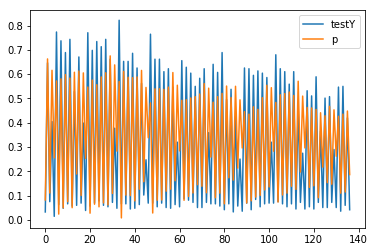

In [75]:
import matplotlib.pyplot as plt

plt.plot(y_test)
plt.plot(p)
plt.legend(['testY', 'p'], loc='upper right')
plt.show()